In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Choose style sheet(s)
plt.style.use("plot_styles/default.mplstyle")

# Import functions from the _color_tools notebook
%run _color_tools.ipynb

# Assign the color palette to a variable.
# Individual colors can be selected by index (e.g. C[0])
C = sns.color_palette().as_hex()
sns.color_palette()

[(0.0, 0.4666666666666667, 0.7333333333333333),
 (0.0, 0.6, 0.5333333333333333),
 (0.9333333333333333, 0.4666666666666667, 0.2),
 (0.8, 0.2, 0.06666666666666667),
 (0.2, 0.7333333333333333, 0.9333333333333333),
 (0.9333333333333333, 0.2, 0.4666666666666667),
 (0.7333333333333333, 0.7333333333333333, 0.7333333333333333),
 (0.0, 0.0, 0.0)]

In [9]:
maps = pd.read_csv("../outputs/stats_maps_non_cpg.tsv", sep="\t", usecols=["csq","maps","ci95"])

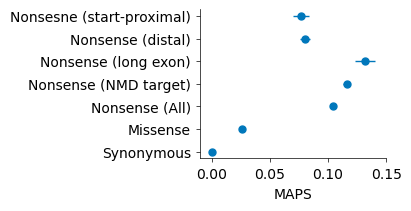

In [28]:
def plot_maps(df, ax):
    ax.errorbar(y=df["csq"], x=df["maps"], xerr=df["ci95"], linestyle="None")
    ax.scatter(y=df["csq"], x=df["maps"])
    ax.set_xlabel("MAPS")
    ax.set_xlim(-0.01,0.15)
    ax.set_yticks(
        ticks=[
            "synonymous",
            "missense",
            "nonsense",
            "nmd_target",
            "long_exon",
            "distal_nmd",
            "start_proximal",
        ],
        labels=[
            "Synonymous",
            "Missense",
            "Nonsense (All)",
            "Nonsense (NMD target)",
            "Nonsense (long exon)",
            "Nonsense (distal)",
            "Nonsesne (start-proximal)",
        ],
        #rotation=90,
        #ha="right",
        #rotation_mode="anchor"
    );

fig, ax = plt.subplots(figsize=(4, 2), layout="constrained")
plot_maps(maps, ax)